# PRÁCTICA 3 ESTADÍSTICA

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.stats import norm

In [32]:
def plot_regions(x, y, tsup, tinf=None, tobs=None):

    plt.figure(figsize=(10, 3))
    if tinf is None:
        plt.fill_between(x, 0, y, (x <= tsup), facecolor='green')
        plt.fill_between(x, 0, y, (x > tsup), facecolor='red')
    else:
        plt.fill_between(x, 0, y, (x >= tinf) & (x <= tsup), facecolor='green')
        plt.fill_between(x, 0, y, (x < tinf), facecolor='red')
        plt.fill_between(x, 0, y, (x > tsup), facecolor='red')

    plt.plot(x, y, '-k', linewidth=2.0)
    
    if tobs is not None:
        plt.plot([tobs, tobs], [0, 0.5*y.max()], '-b', linewidth=2.0)

    plt.grid(True)
    plt.title("Regiones de aceptacion y rechazo")
    plt.show()

## Ejercicio 1


La desviación estándar de un proceso en condiciones correctas es 3.2. Se toma una
muestra de tamaño 12 y se observan los siguientes valores: 25, 17, 18, 27, 17, 22, 16, 20,
24, 20, 22 y 16.
- Contrasta la hipótesis de funcionamiento correcto con un nivel de significación de 0.05
- Calcula el nivel crítico del contraste
- Suponiendo una desviación estándar como la observada, ¿cuál es el tamaño máximo que debería tener la muestra para poder aceptar la hipótesis?


In [66]:
sigma = 3.2
sample = [25, 17, 18, 27, 17, 22, 16, 20, 24, 20, 22, 16]
n = len(sample)
mean = np.mean(sample)
alpha=.05

print(n, mean, sigma)

12 20.333333333333332 3.2


Se asume que la variable aleatoria que se está midiendo sigue una distribución normal $X \sim N(\mu, 3.2)$.

Si el funcionamiento es correcto, entonces $\sigma^2 = 10.24$. Por otro lado, se considera funcionamiento incorrecto que $\sigma^2 \ne 10.24$. Por tanto, contrastar la hipótesis de funcionamiento correcto es equivalente a:

$H_0: \sigma^2 = 10.24$

$H_1: \sigma^2 \ne 10.24$

Para este caso, tomando como diferencia 
$$d = \frac{(n-1)\hat{s}^2}{\sigma_0^2}$$

la región de aceptación es:

$$
\chi_{1-\alpha/2}^2 \leq \frac{(n-1)\hat{s}^2}{\sigma_0^2} \leq \chi_{\alpha/2}^2 
$$


In [67]:
s_hat = np.var(sample, ddof=1)
sup = chi2.ppf(1-alpha/2, n-1)
inf = chi2.ppf(alpha/2, n-1)

inf, sup

d = (n-1)*s_hat/sigma**2
pvalue = 1-chi2.cdf(d, n-1)

d, inf, sup, pvalue

(14.713541666666666, 3.8157482522360993, 21.9200492610212, 0.19599029375811738)

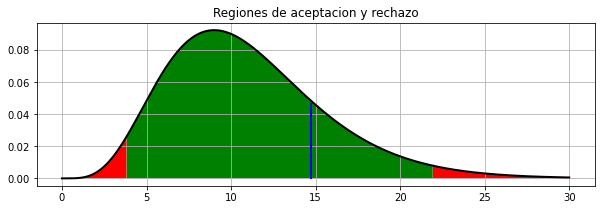

In [68]:
x = np.arange(0, 30, 0.01)
y = chi2.pdf(x, df=n-1)
plot_regions(x, y, tsup=sup, tinf=inf, tobs=d)

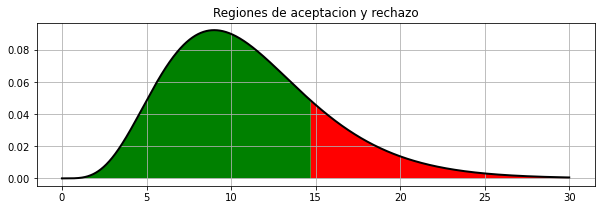

In [69]:
x = np.arange(0, 30, 0.01)
y = chi2.pdf(x, df=n-1)
plot_regions(x, y, tsup=d)

El pvalor del test, sabiendo que $d \sim \chi^2_{11} $ es $\alpha = P\lbrace d \ge \hat{d} | H_0\rbrace = P\lbrace \chi^2_{11} \ge 14.71\rbrace = 0.19$

El tamaño muestral mínimo para un nivel de significación $\alpha=0.05$ viene dado por la expresión:

$$
P\lbrace d \ge \hat{d} | H_0\rbrace = P\lbrace \chi^2_{1-\alpha} \ge \frac{(n-1)\hat{s}^2}{\sigma_0^2} | H_0\rbrace = 0.05
$$

Luego $n \ge 1 + \frac{\chi^2_{n-1;\alpha}\sigma_0^2}{\hat{s}^2}$

In [84]:
n_min = 1+(sup*sigma**2)/s_hat

In [85]:
n_min

17.38766160682364